In [1]:
import numpy as pd
import pandas as np
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import seaborn as sn
import pandas as pd


In [2]:
bitcoin=np.read_csv(r'/content/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

In [3]:
bitcoin

,Timestamp,Open,High,Low,Close,Volume_BTC,Volume_Currency,Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1048570,1388232120,734.60,734.60,730.00,734.55,1.789687,1313.640757,734.005698
1048571,1388232180,734.55,734.55,730.71,730.71,0.110236,80.802051,732.991499
1048572,1388232240,734.40,734.40,730.51,730.51,0.554786,407.247985,734.063488
1048573,1388232300,730.51,733.63,730.51,731.10,0.620446,453.777190,731.372707


In [4]:
bitcoin.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_BTC',
       'Volume_Currency', 'Weighted_Price'],
      dtype='object')

In [5]:
bitcoin.shape

(1048575, 8)

In [6]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Timestamp        1048575 non-null  int64  
 1   Open             342169 non-null   float64
 2   High             342169 non-null   float64
 3   Low              342169 non-null   float64
 4   Close            342169 non-null   float64
 5   Volume_BTC       342169 non-null   float64
 6   Volume_Currency  342169 non-null   float64
 7   Weighted_Price   342169 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 64.0 MB


In [7]:
bitcoin.isnull().sum()

,0
Timestamp,0
Open,706406
High,706406
Low,706406
Close,706406
Volume_BTC,706406
Volume_Currency,706406
Weighted_Price,706406


In [9]:
bitcoin=bitcoin.dropna()

In [10]:
bitcoin.isnull().sum()

,0
Timestamp,0
Open,0
High,0
Low,0
Close,0
Volume_BTC,0
Volume_Currency,0
Weighted_Price,0


In [37]:
# from sklearn import preprocessing

# # label_encoder object knows how to understand word labels.
# label_encoder = preprocessing.LabelEncoder()

# # Encode labels in column 'species'.
# bitcoin['name']= label_encoder.fit_transform(bitcoin['name'])

# bitcoin['name'].unique()

array([146, 454, 148, ..., 629, 142, 723])

In [14]:
x=bitcoin[['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_BTC',
       'Volume_Currency']]

In [15]:
x

,Timestamp,Open,High,Low,Close,Volume_BTC,Volume_Currency
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380337
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160
...,...,...,...,...,...,...,...
1048570,1388232120,734.60,734.60,730.00,734.55,1.789687,1313.640757
1048571,1388232180,734.55,734.55,730.71,730.71,0.110236,80.802051
1048572,1388232240,734.40,734.40,730.51,730.51,0.554786,407.247985
1048573,1388232300,730.51,733.63,730.51,731.10,0.620446,453.777190


In [18]:
y=bitcoin[['Weighted_Price']]

In [19]:
y

,Weighted_Price
0,4.390000
478,4.390000
547,4.526411
548,4.580000
1224,4.580000
...,...
1048570,734.005698
1048571,732.991499
1048572,734.063488
1048573,731.372707


In [23]:
#SPLIT THE DATASET
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.1)

In [24]:
xtrain.shape

(307952, 7)

In [25]:
xtest.shape

(34217, 7)

In [26]:
ytrain.shape

(307952, 1)

In [27]:
ytest.shape

(34217, 1)

In [28]:
from sklearn.metrics import r2_score
from sklearn import tree

# Assuming x and y are your training data and labels
# Assuming xtest and ytest are your test data and labels

# Create and fit the Decision Tree Regressor
clf = tree.DecisionTreeRegressor()
clf.fit(x, y)

# Predict using the regressor
y_pred = clf.predict(xtest)

# Compute R-squared
score = r2_score(ytest, y_pred)  # Use r2_score for regression
print("R-squared:", score)

R-squared: 1.0


In [29]:
prediction=clf.predict([[1325317920,4.39,4.39,4.39,4.39	,0.455581,2.000000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [30]:
print(prediction)

[4.39]


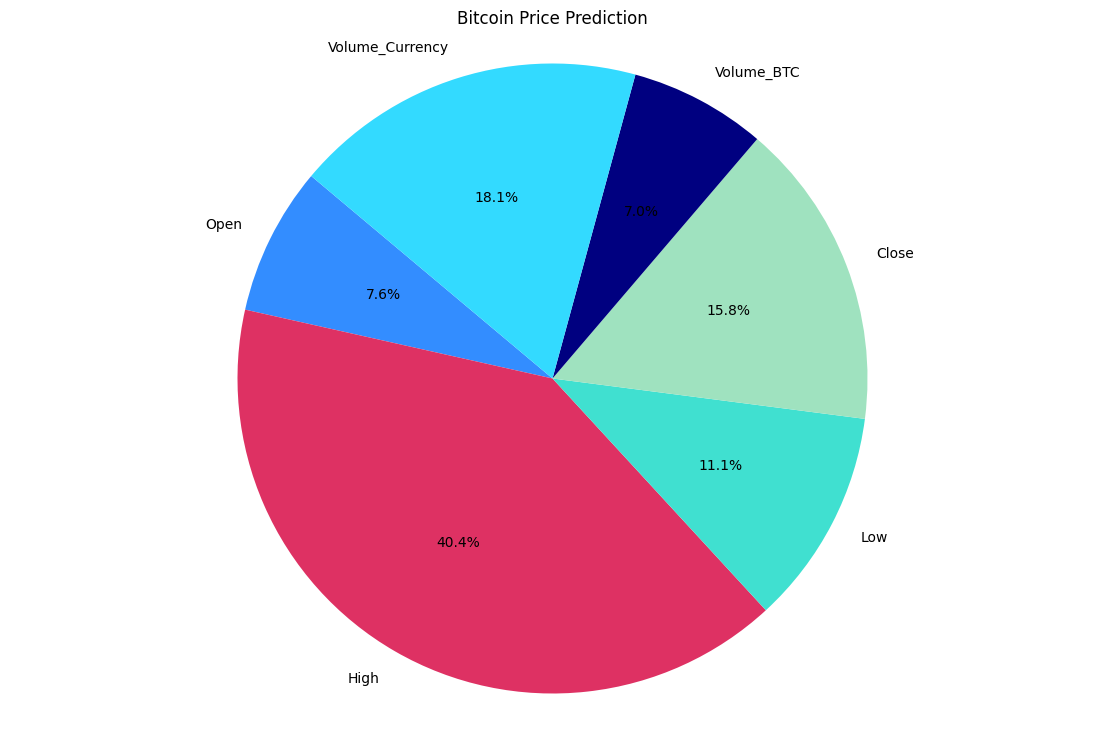

In [31]:
import matplotlib.pyplot as plt

# Sample data
df= [ 'Open','High','Low','Close','Volume_BTC','Volume_Currency']
values = [13,69.0,19,27,12,31]  # Corresponding percentages
colors=['#338dff','#DE3163','#40E0D0','#9FE2BF','#000080','#33daff']

# Create a pie chart
plt.figure(figsize=(14,9))
plt.pie(values, labels=df, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal') # Equal aspect ratio ensures the pie chart is circular.

# Add a title
plt.title('Bitcoin Price Prediction')

# Display the pie chart
plt.show()

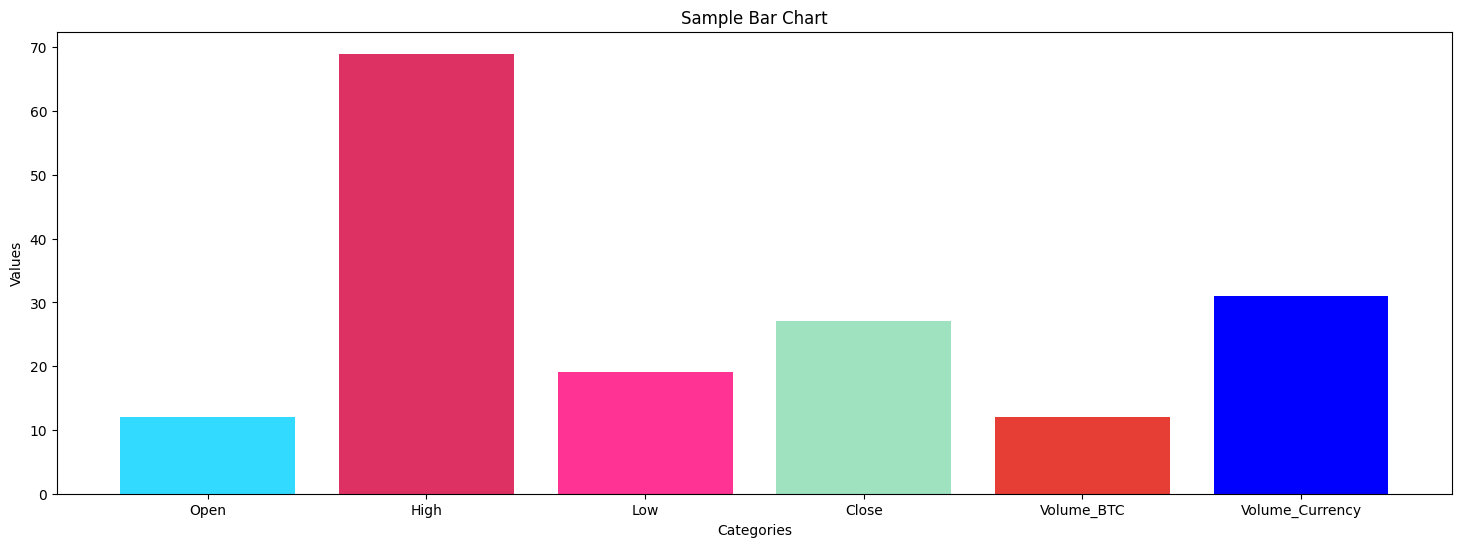

In [32]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Open','High','Low','Close','Volume_BTC','Volume_Currency']
values = [12,69.0,19,27,12,31]  # Corresponding percentages
colors=['#33daff','#DE3163','#ff3393','#9FE2BF','#e63d35','#0000FF','#186a3b']

# Create a bar chart
plt.figure(figsize=(18, 6))
plt.bar(categories, values, color=colors)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Sample Bar Chart')

# Display the bar chart
plt.show()

In [33]:
import pickle

In [34]:
import os
import pickle
if os.path.isfile(r"Bitcoin price.pkl"):
    print("File Exists")
else:
    pickle.dump(clf,open(r'Bitcoin price.pkl','wb'))
    print("Model Loaded!")

Model Loaded!
